In [3]:
import pandas as pd

demo_df = pd.read_csv('DemoClean.csv')
trans_df = pd.read_csv("Demonoblanks.csv")

In [15]:
#lets look at the age distribution 
demo_df['Age'].sort_values()#.value_counts()#.plot(kind = 'bar',figsize = (12,12))

2629    18.0
1860    18.0
180     18.0
152     18.0
893     18.0
        ... 
0       66.0
471     76.0
1635    76.0
739     84.0
509     88.0
Name: Age, Length: 2630, dtype: float64

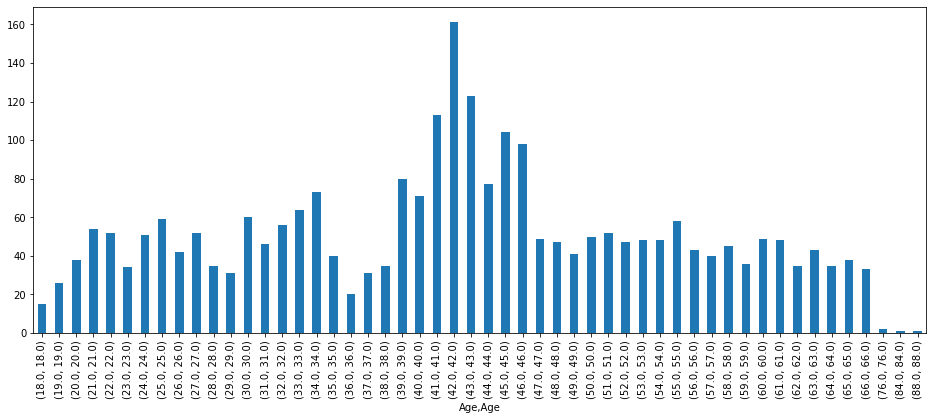

In [135]:
#age demographic
group = demo_df[['Age']].groupby('Age')#sort_values(by = 'Age')
group.head()
group['Age'].value_counts(sort = False).plot(kind = 'bar',figsize = (16,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x064F6CA0>],
      dtype=object)

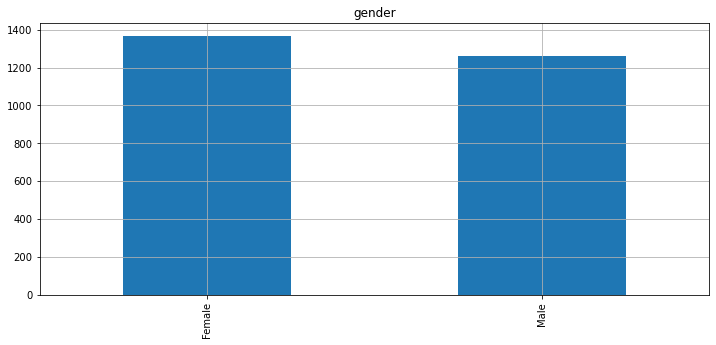

In [47]:
#job industry category
demo_df['gender'].value_counts().plot(kind = 'bar', figsize = (12,5),subplots = True, grid = True)

In [34]:
demo_df.head()

,customer_id,gender,Age,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car
0,1,Female,66.0,93,Executive Secretary,Health,Mass Customer,Yes
1,2,Male,39.0,81,Administrative Officer,Financial Services,Mass Customer,Yes
2,3,Male,66.0,61,Recruiting Manager,Property,Mass Customer,Yes
3,9,Female,47.0,97,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes
4,10,Female,31.0,49,Senior Quality Engineer,Financial Services,Mass Customer,Yes


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0653C370>],
      dtype=object)

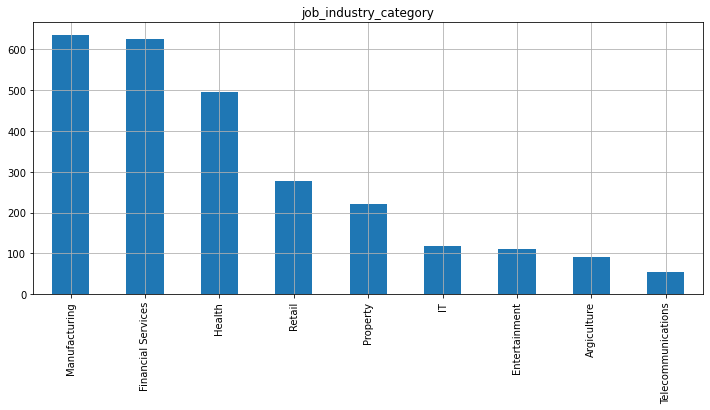

In [49]:
demo_df['job_industry_category'].value_counts().plot(kind = 'bar', figsize = (12,5),subplots = True, grid = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x06679DC0>],
      dtype=object)

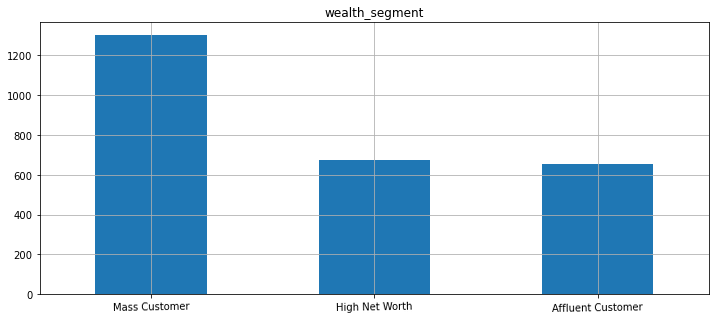

In [52]:
demo_df['wealth_segment'].value_counts().plot(kind = 'bar', figsize = (12,5),subplots = True, grid = True, rot = 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0ED22BC8>],
      dtype=object)

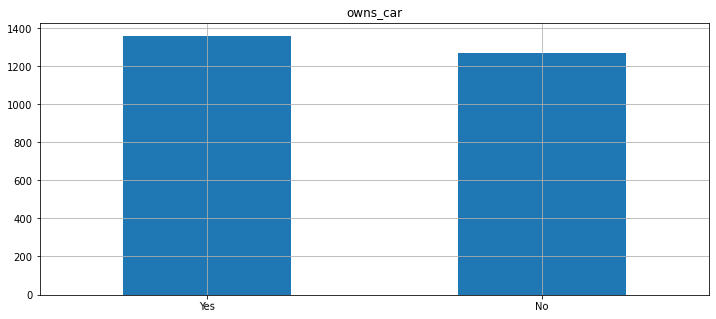

In [53]:
demo_df['owns_car'].value_counts().plot(kind = 'bar', figsize = (12,5),subplots = True, grid = True, rot = 1)

In [64]:
demo_postcode_cardf = demo_df[['customer_id','owns_car']]
demo_postcode_cardf.set_index('customer_id', inplace = True)
demo_postcode_cardf.head()

,owns_car
customer_id,
1,Yes
2,Yes
3,Yes
9,Yes
10,Yes


In [60]:
address_df = pd.read_csv("AddressClean.csv")
address_df.set_index('customer_id',inplace = True)
address_df.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1,060 Morning Avenue,2016,NSW,Australia,10
2,6 Meadow Vale Court,2153,NSW,Australia,10
4,0 Holy Cross Court,4211,QLD,Australia,9
5,17979 Del Mar Point,2448,NSW,Australia,4
6,9 Oakridge Court,3216,VIC,Australia,9


In [86]:
new = demo_postcode_cardf.join(address_df['state']).dropna()
new.head()

,owns_car,state
customer_id,,
1,Yes,NSW
2,Yes,NSW
9,Yes,NSW
12,No,QLD
13,Yes,VIC


In [87]:
new = new.groupby('state')

In [112]:

dfnsw = new.get_group('NSW')[['owns_car','state']]
#df.reset_index(inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0F3CF370>],
      dtype=object)

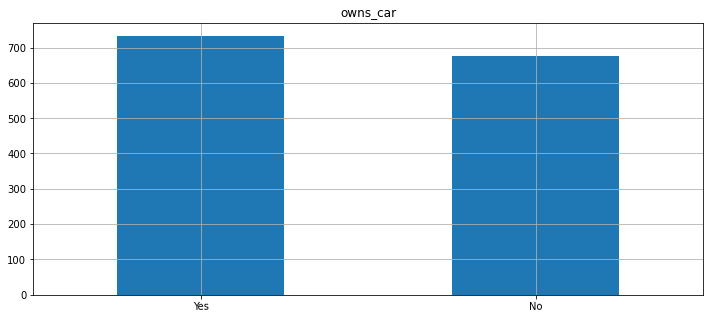

In [113]:
dfnsw['owns_car'].value_counts().plot(kind = 'bar', figsize = (12,5),subplots = True, grid = True, rot = 1)

In [117]:
dfqld = new.get_group('QLD')[['owns_car','state']]
dfvic = new.get_group('VIC')[['owns_car','state']]

In [118]:
print("NSW")
print(df['owns_car'].value_counts())
print("QLD")
print(dfqld['owns_car'].value_counts())
print("VIC")
print(dfvic['owns_car'].value_counts())

NSW
Yes    734
No     677
Name: owns_car, dtype: int64
QLD
Yes    281
No     267
Name: owns_car, dtype: int64
VIC
Yes    344
No     325
Name: owns_car, dtype: int64


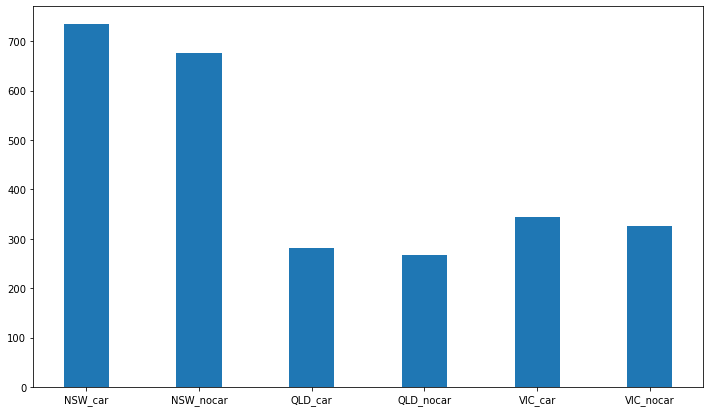

In [130]:
import matplotlib.pyplot as plt
import numpy as np
x = ['NSW_car','NSW_nocar','QLD_car','QLD_nocar','VIC_car','VIC_nocar']
y = [734,677,281,267,344,325]

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(len(x)))
plt.bar(x = x,height = y, width = 0.4)

plt.show()

In [146]:
group = demo_df[['Age']].groupby('Age')#sort_values(by = 'Age')
#group['Age'].unique()
len(group['Age'])
group.head()

,Age
0,66.0
1,39.0
2,66.0
3,47.0
4,31.0
...,...
584,20.0
591,50.0
690,57.0
739,84.0


In [144]:
age_wealth_df = demo_df[['customer_id','Age','wealth_segment']]
age_wealth_df.groupby('Age')

In [163]:
sorted_age = age_wealth_df.sort_values('Age').set_index('customer_id')
sorted_age.reset_index(inplace = True)
sorted_age.head()

,customer_id,Age,wealth_segment
0,3997,18.0,High Net Worth
1,2759,18.0,Affluent Customer
2,245,18.0,Affluent Customer
3,212,18.0,Affluent Customer
4,1322,18.0,Mass Customer


In [158]:
sorted_age['Age'][0]

18.0

In [166]:
len(sorted_age)

2630

In [170]:
#seperate the age groups so we can look at wealth segment of respective age groups
sorted_age['Age'].unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 76., 84., 88.])

In [181]:
seg1 = sorted_age[sorted_age['Age']<=30]
seg2 = sorted_age[(sorted_age['Age']>30) & (sorted_age['Age']<=43)]
seg3 = sorted_age[(sorted_age['Age']>43) & (sorted_age['Age']<=56)]
seg4 = sorted_age[(sorted_age['Age']>56) & (sorted_age['Age']<=88)]


In [182]:
seg1.head()

,customer_id,Age,wealth_segment
0,3997,18.0,High Net Worth
1,2759,18.0,Affluent Customer
2,245,18.0,Affluent Customer
3,212,18.0,Affluent Customer
4,1322,18.0,Mass Customer


In [183]:
print('seg1')
print(seg1['wealth_segment'].value_counts())#.plot(kind = 'bar', figsize = (12,5),subplots = True, grid = True, rot = 1)
print('seg2')
print(seg2['wealth_segment'].value_counts())
print('seg3')
print(seg3['wealth_segment'].value_counts())
print('seg4')
print(seg4['wealth_segment'].value_counts())

seg1
Mass Customer        260
Affluent Customer    148
High Net Worth       141
Name: wealth_segment, dtype: int64
seg2
Mass Customer        459
High Net Worth       241
Affluent Customer    213
Name: wealth_segment, dtype: int64
seg3
Mass Customer        373
Affluent Customer    198
High Net Worth       191
Name: wealth_segment, dtype: int64
seg4
Mass Customer        208
High Net Worth       101
Affluent Customer     97
Name: wealth_segment, dtype: int64


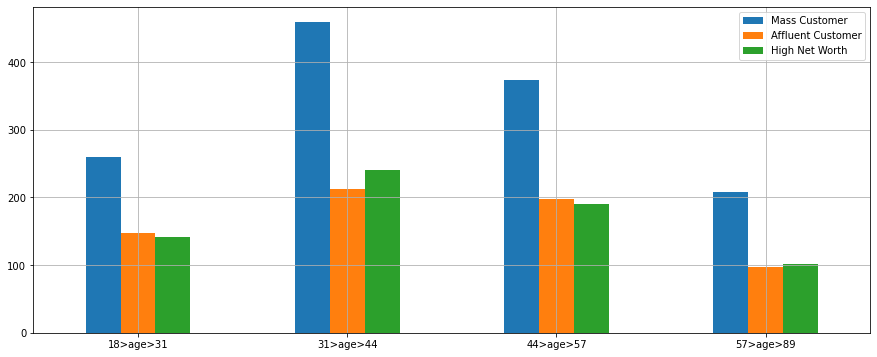

In [187]:
MC = [260,459,373,208]
AC = [148,213,198,97]
HW = [141,241,191,101]

index = ['18>age>31', '31>age>44','44>age>57','57>age>89']

final = pd.DataFrame({'Mass Customer': MC, 'Affluent Customer': AC, 'High Net Worth': HW}, index = index)

final.plot(kind = 'bar', rot = 0,grid = 1, figsize = (15,6))
